<a href="https://colab.research.google.com/github/gsnsg/598_Intro_To_DL/blob/main/HW1_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting GDrive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print("Tf version: ", tf.__version__)

Tf version:  2.8.2


In [3]:
mnist = tf.keras.datasets.mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("Train Images shape:", train_images.shape, "Train Labels Shape:", train_labels.shape)

Train Images shape: (60000, 28, 28) Train Labels Shape: (60000,)


In [5]:
vals, _, count = tf.unique_with_counts(train_labels, out_idx=tf.dtypes.int32)
print(vals, count)

tf.Tensor([5 0 4 1 9 2 3 6 7 8], shape=(10,), dtype=uint8) tf.Tensor([5421 5923 5842 6742 5949 5958 6131 5918 6265 5851], shape=(10,), dtype=int32)


In [6]:
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


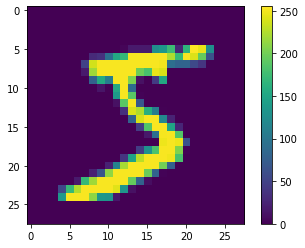

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Normalize Images

In [8]:
train_images = (train_images / 255)
test_images = (test_images / 255)

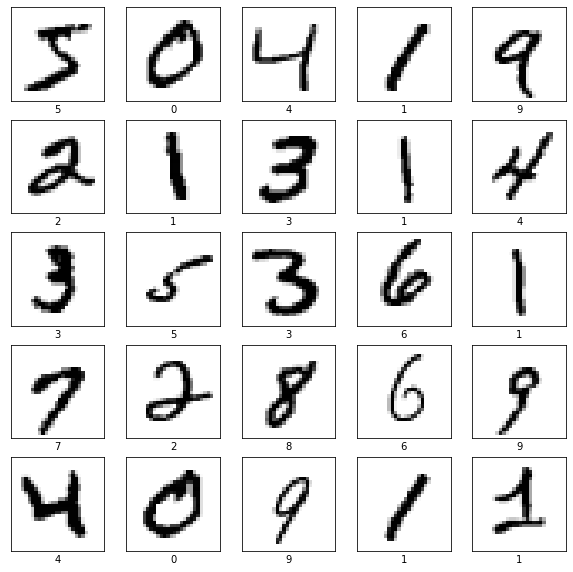

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

##Common Helper Methods


In [10]:
# (n, 28, 28, 1) -> (n, 28 * 28)
def make_model(model_name, hidden_layers, optimizer='adam'):
  layers = [tf.keras.layers.Flatten(input_shape=(28, 28))] + hidden_layers + [tf.keras.layers.Dense(10)]
  model = tf.keras.models.Sequential(layers, name=model_name)
  model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])   
  return model

In [11]:
IMG_PATH = "/content/gdrive/MyDrive/Images/"

def plot_and_save(model_name, history, img_path = IMG_PATH):

  plt.clf()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(model_name + "_Accuracy")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(f"{img_path}/{model_name}_Accuracy.png")

  plt.clf()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name + "_Loss")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(f"{img_path}/{model_name}_Loss.png")
  

In [20]:
def train_and_evaluate(model, epochs = 10, img_save_path = IMG_PATH):
  print(f"\nStarted training {model.name}")
  history = model.fit(train_images, train_labels, validation_split = 0.2, epochs=epochs, verbose=2)
  test_loss, acc = model.evaluate(test_images, test_labels, verbose=2)
  plot_and_save(model.name, history, img_path = img_save_path)
  return test_loss, acc

## 1. Fixing Number of Hidden Units in each layer and varying number of Hidden Layers

For this experiment let us fix the number of units in each hidden layer to be **32** 

We are building different models with a Flatten input layer and 10 unit Dense Output Layer and variable number of  hidden layers (1-3)


Started training Fixed_Units_32_Model_With_1_Hidden_Layers
Epoch 1/10
1500/1500 - 4s - loss: 0.3846 - accuracy: 0.8920 - val_loss: 0.2200 - val_accuracy: 0.9376 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.1983 - accuracy: 0.9430 - val_loss: 0.1776 - val_accuracy: 0.9498 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 0.1552 - accuracy: 0.9548 - val_loss: 0.1513 - val_accuracy: 0.9577 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 6s - loss: 0.1275 - accuracy: 0.9625 - val_loss: 0.1387 - val_accuracy: 0.9589 - 6s/epoch - 4ms/step
Epoch 5/10
1500/1500 - 3s - loss: 0.1117 - accuracy: 0.9670 - val_loss: 0.1315 - val_accuracy: 0.9608 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 0.0991 - accuracy: 0.9703 - val_loss: 0.1284 - val_accuracy: 0.9618 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 0.0895 - accuracy: 0.9736 - val_loss: 0.1260 - val_accuracy: 0.9629 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 3s - loss: 0.0809 - accuracy: 0.9760 - val_loss: 

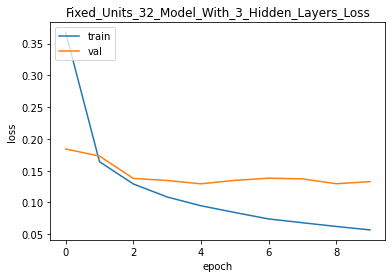

In [33]:
HIDDEN_LAYER_UNITS = 32

layers_arr = []
for layer_cnt in range(1, 4):
  tmp_arr = []
  for i in range(layer_cnt):
    tmp_arr.append(tf.keras.layers.Dense(HIDDEN_LAYER_UNITS, activation="relu"))
  layers_arr.append(tmp_arr)

  model_names = [f"Fixed_Units_{HIDDEN_LAYER_UNITS}_Model_With_{i}_Hidden_Layers" for i in range(1, 4)]
models = [ make_model(model_names[i], layers_arr[i]) for i in range(0, 3)]

results = []
for model in models:
  results.append(train_and_evaluate(model))


In [41]:
for name, tup in zip(model_names, results):
  print(name, ", Test Accuracy: ", tup[-1])

Fixed_Units_32_Model_With_1_Hidden_Layers , Test Accuracy:  0.9646999835968018
Fixed_Units_32_Model_With_2_Hidden_Layers , Test Accuracy:  0.9660999774932861
Fixed_Units_32_Model_With_3_Hidden_Layers , Test Accuracy:  0.9695000052452087


## 2. Fixing Number of Number of Hidden Layers

For this experiment let us fix the number of hidden layers to be **3** 

We are building different models with a Flatten input layer and 10 unit Dense Output Layer and 3 hidden layers with varying neurons per layer


Started training Fixed_Hidden_Layers_Model_With_2_Hidden_Units
Epoch 1/10
1500/1500 - 3s - loss: 2.0513 - accuracy: 0.2110 - val_loss: 1.8944 - val_accuracy: 0.2657 - 3s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 3s - loss: 1.8223 - accuracy: 0.3016 - val_loss: 1.7352 - val_accuracy: 0.3242 - 3s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 1.7083 - accuracy: 0.3278 - val_loss: 1.6574 - val_accuracy: 0.3362 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 3s - loss: 1.6494 - accuracy: 0.3442 - val_loss: 1.6086 - val_accuracy: 0.3524 - 3s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 3s - loss: 1.6096 - accuracy: 0.3514 - val_loss: 1.5787 - val_accuracy: 0.3580 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 1.5828 - accuracy: 0.3573 - val_loss: 1.5559 - val_accuracy: 0.3655 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 1.5550 - accuracy: 0.3710 - val_loss: 1.5285 - val_accuracy: 0.3848 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 3s - loss: 1.5301 - accuracy: 0.3831 - val_lo

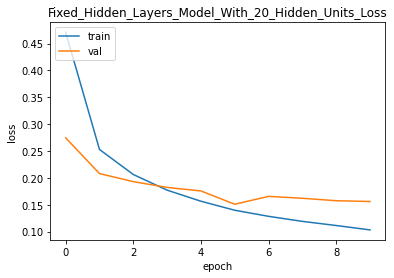

In [49]:
NUM_HIDDEN_LAYERS = 3

num_neurons = [2 * i for i in range(1, 11)]

names = [f"Fixed_Hidden_Layers_Model_With_{2 * i}_Hidden_Units" for i in range(1, 11)]

models = []
for neurons, model_name in zip(num_neurons, names):
  layers = []
  for layer in range(NUM_HIDDEN_LAYERS):
    layers.append(tf.keras.layers.Dense(neurons, activation="relu"))
  
  models.append(make_model(model_name, layers))


results = []
for model in models:
  results.append(train_and_evaluate(model, 10, IMG_PATH + "Part2/"))

In [50]:
for name, tup in zip(names, results):
  print(name, ", Test Accuracy: ", tup[-1])

Fixed_Hidden_Layers_Model_With_2_Hidden_Units , Test Accuracy:  0.3971000015735626
Fixed_Hidden_Layers_Model_With_4_Hidden_Units , Test Accuracy:  0.8240000009536743
Fixed_Hidden_Layers_Model_With_6_Hidden_Units , Test Accuracy:  0.9024999737739563
Fixed_Hidden_Layers_Model_With_8_Hidden_Units , Test Accuracy:  0.9211999773979187
Fixed_Hidden_Layers_Model_With_10_Hidden_Units , Test Accuracy:  0.9305999875068665
Fixed_Hidden_Layers_Model_With_12_Hidden_Units , Test Accuracy:  0.9484999775886536
Fixed_Hidden_Layers_Model_With_14_Hidden_Units , Test Accuracy:  0.9487000107765198
Fixed_Hidden_Layers_Model_With_16_Hidden_Units , Test Accuracy:  0.9509000182151794
Fixed_Hidden_Layers_Model_With_18_Hidden_Units , Test Accuracy:  0.9581999778747559
Fixed_Hidden_Layers_Model_With_20_Hidden_Units , Test Accuracy:  0.9560999870300293


#Different number of neurons in hidden layers


Started training Model_16
Epoch 1/10
1500/1500 - 5s - loss: 0.4687 - accuracy: 0.8691 - val_loss: 0.2956 - val_accuracy: 0.9163 - 5s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 3s - loss: 0.3022 - accuracy: 0.9145 - val_loss: 0.3045 - val_accuracy: 0.9139 - 3s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 0.2848 - accuracy: 0.9196 - val_loss: 0.2656 - val_accuracy: 0.9265 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 2s - loss: 0.2759 - accuracy: 0.9226 - val_loss: 0.2714 - val_accuracy: 0.9249 - 2s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 3s - loss: 0.2711 - accuracy: 0.9236 - val_loss: 0.2659 - val_accuracy: 0.9279 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 0.2658 - accuracy: 0.9259 - val_loss: 0.2684 - val_accuracy: 0.9254 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 0.2624 - accuracy: 0.9263 - val_loss: 0.2698 - val_accuracy: 0.9257 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 2s - loss: 0.2596 - accuracy: 0.9273 - val_loss: 0.2688 - val_accuracy: 0.9277 - 2

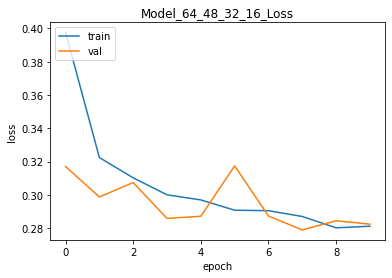

In [21]:
from itertools import permutations

NUM_HIDDEN_LAYERS = 4

models = []
results = []

for layer_cnt in range(1, NUM_HIDDEN_LAYERS + 1):
  num_neurons = [16 * i for i in range(1, layer_cnt + 1)]
  for perm in permutations(num_neurons):
    model_name = "Model_" + "_".join([str(i) for i in perm])

    layers = []
    for i in range(layer_cnt):
      layers.append(tf.keras.layers.Dense(perm[i]))
    
    models.append(make_model(model_name, layers))
    
results = []
for model in models:
  results.append(train_and_evaluate(model, 10, IMG_PATH + "Part3/"))



In [23]:
for model, tup in zip(models, results):
  print(model.name, ", Test Accuracy: ", tup[-1])

Model_16 , Test Accuracy:  0.9244999885559082
Model_16_32 , Test Accuracy:  0.9229000210762024
Model_32_16 , Test Accuracy:  0.9240999817848206
Model_16_32_48 , Test Accuracy:  0.9221000075340271
Model_16_48_32 , Test Accuracy:  0.9157000184059143
Model_32_16_48 , Test Accuracy:  0.9162999987602234
Model_32_48_16 , Test Accuracy:  0.9200000166893005
Model_48_16_32 , Test Accuracy:  0.9199000000953674
Model_48_32_16 , Test Accuracy:  0.9175999760627747
Model_16_32_48_64 , Test Accuracy:  0.9151999950408936
Model_16_32_64_48 , Test Accuracy:  0.9194999933242798
Model_16_48_32_64 , Test Accuracy:  0.9208999872207642
Model_16_48_64_32 , Test Accuracy:  0.9194999933242798
Model_16_64_32_48 , Test Accuracy:  0.9190000295639038
Model_16_64_48_32 , Test Accuracy:  0.9193999767303467
Model_32_16_48_64 , Test Accuracy:  0.9153000116348267
Model_32_16_64_48 , Test Accuracy:  0.9182000160217285
Model_32_48_16_64 , Test Accuracy:  0.9186999797821045
Model_32_48_64_16 , Test Accuracy:  0.92030000686